In [1]:
import sys
sys.path.append("../pre-processing")
sys.path.append("../pre-processing/methods")
from timeDomain import *
from parse import parse
from freqDomain import *
from prepare_data import prepare_data
import numpy as np
import matplotlib.pyplot as plt
import math
import pickle

# Load the X

In [67]:
new_x = prepare_data("/Users/williamlevine/Downloads/OpenBCI-RAW-2017-06-26_23-26-44.txt", return_multi_feat = True)[0]

# Generate the labels

In [72]:
labels = []
for i in range(6):
    for _ in range(400):
        labels.append(0)
    for _ in range(400):
        labels.append(1)
    for _ in range(400):
        labels.append(-1)
labels = labels[0:7000]

In [73]:
new_x = new_x[0:7000]

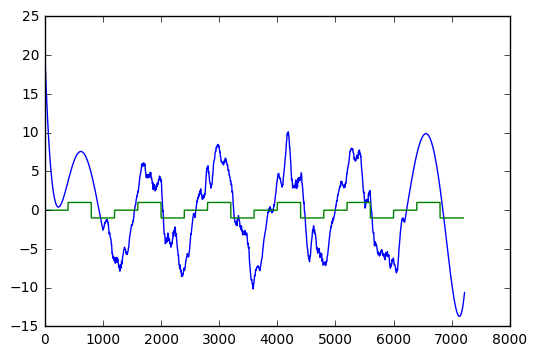

In [71]:
plt.plot(new_x[:, 1] * 5000)
plt.plot(labels)
plt.show()

In [74]:
net = [new_x, labels]

In [76]:
len(net[0])

7000

In [77]:
pickle.dump(net, open("/Users/williamlevine/Downloads/2-Seconds-Will-Trial-1.MultFeat", 'wb'))

In [37]:
net_x = np.concatenate((new_x, 2 * old_x, new_x))
net_labels = np.concatenate((labels, old_labels, labels))
net_data = [net_x, net_labels]

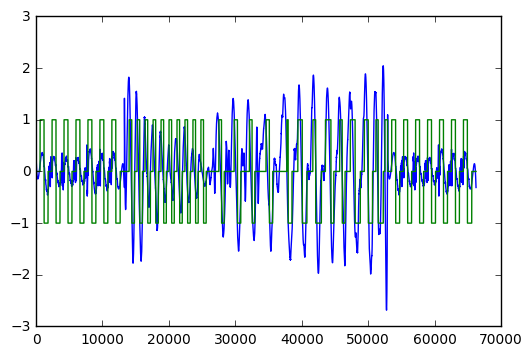

In [35]:
plt.plot(net_x[:, 2] * 10)
plt.plot(net_labels)
plt.show()

# Only grab the not horrible parts of the data

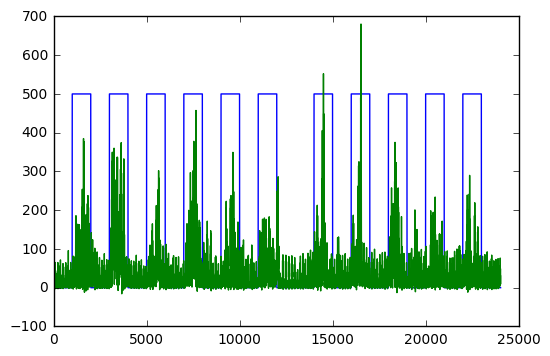

In [17]:
labels = labels[0:len(rawData)]
plt.plot([labels[i] * 500 for i in range(len(labels))])
plt.plot([np.max(rawData[i]) for i in range(len(rawData))])
plt.show()

In [18]:
net_data = [rawData, labels]
print np.array(labels).shape
print np.array(rawData).shape

(24034,)
(24034, 36)


# Pickle Dump It

In [38]:
import pickle
pickle.dump(net_data, open('/Users/williamlevine/Downloads/concat.MultFeat', 'wb'))

# Make Sure It Worked

In [20]:
import pickle
new_data = pickle.load(open('/Users/williamlevine/Downloads/OpenBCI-RAW-2017-Contract-Uncontract-5-Seconds-Trial-1.DatLabl', 'r'))

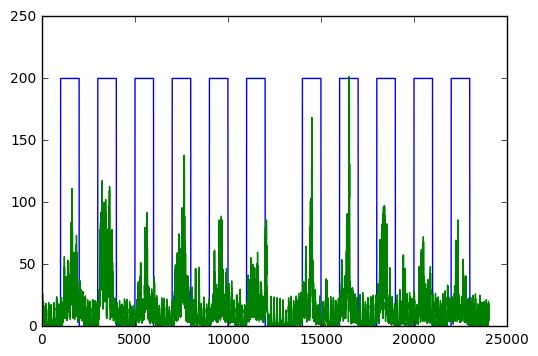

In [26]:
plt.plot(np.array(new_data[1]) * 200)
plt.plot([np.std(new_data[0][i]) for i in range(len(new_data[0]))])
plt.show()

In [27]:
print new_data[0].shape
print np.array(new_data[1]).shape

(24034, 36)
(24034,)


In [132]:
net_data = [rawData, labels]
pickle.dump(net_data, open('/Users/williamlevine/Downloads/OpenBCI-RAW-2017-Fast-Richard-Trial-1.DatLabl', 'wb'))

In [133]:
new_data = pickle.load(open('/Users/williamlevine/Downloads/OpenBCI-RAW-2017-Fast-Richard-Trial-1.DatLabl', 'r'))

In [135]:
new_data[0].shape

(4800, 36)

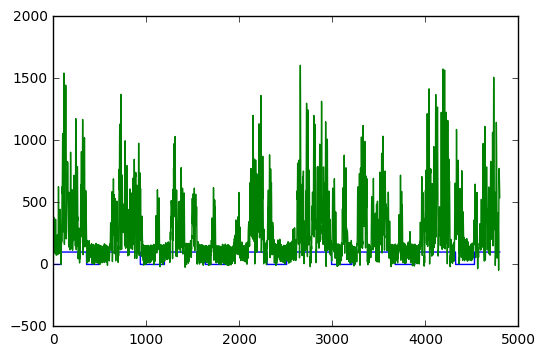

In [138]:
plt.plot(new_data[1] * 100)
plt.plot([np.max(new_data[0][i]) for i in range(len(new_data[0]))])
plt.show()

# Concatenation

(16811,)
(4900,)


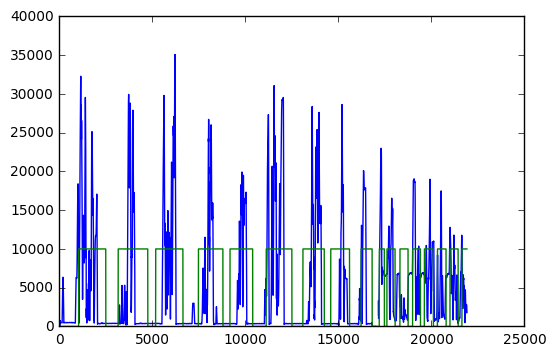

In [33]:
import pickle
data_1 = pickle.load(open('/Users/williamlevine/Downloads/OpenBCI-RAW-Mixture-Trial-4.DatLabl', 'r'))
labels_1 = data_1[1]
x_1 = data_1[0]
data_2 = pickle.load(open('/Users/williamlevine/Downloads/OpenBCI-RAW-2017-Fast-Richard-Trial-1.DatLabl', 'r'))
labels_2 = np.array(data_2[1])[:, 0]
x_2 = data_2[0]
new_x = np.concatenate((x_1, [[0] * 36 for _ in range(200)], x_2))
new_labels = np.concatenate((labels_1, [0] * 200, labels_2))
new_net_data = [new_x, new_labels]
pickle.dump(new_net_data, open('/Users/williamlevine/Downloads/Mixture-Trial-4-And-Fast-Richard-Trial-1.DatLabl', 'wb'))

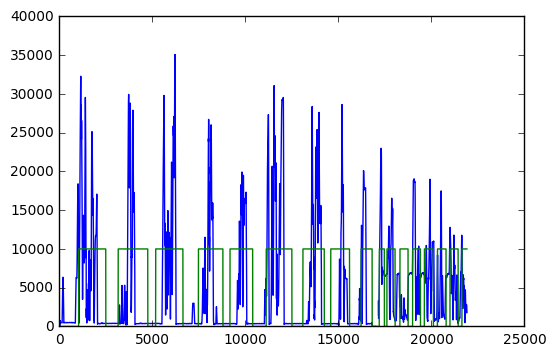

In [32]:
new_data = pickle.load(open('/Users/williamlevine/Downloads/Mixture-Trial-4-And-Fast-Richard-Trial-1.DatLabl', 'r'))
plt.plot([np.std(new_data[0][i]) for i in range(len(new_data[0]))])
plt.plot(new_data[1] * 10000)
plt.show()